# Programming Assignment #3

In [1]:
import numpy as np
from os.path import dirname, join as pjoin
from scipy.io import wavfile
from sklearn.cluster import KMeans
from skimage import util

import matplotlib.pyplot as plt
plt.style.use('ggplot')

## A

In [2]:
# Read sound file
sample_rate, data = wavfile.read('tone.wav')
len_in_float = data.shape[0] / sample_rate

# Calculate duration
duration = len(data) / sample_rate

print("Sample Rate {}".format(sample_rate))
print("Time points {}".format(len(data)))
print("The length {:3.2f}s".format(duration))

Sample Rate 44100
Time points 99225
The length 2.25s


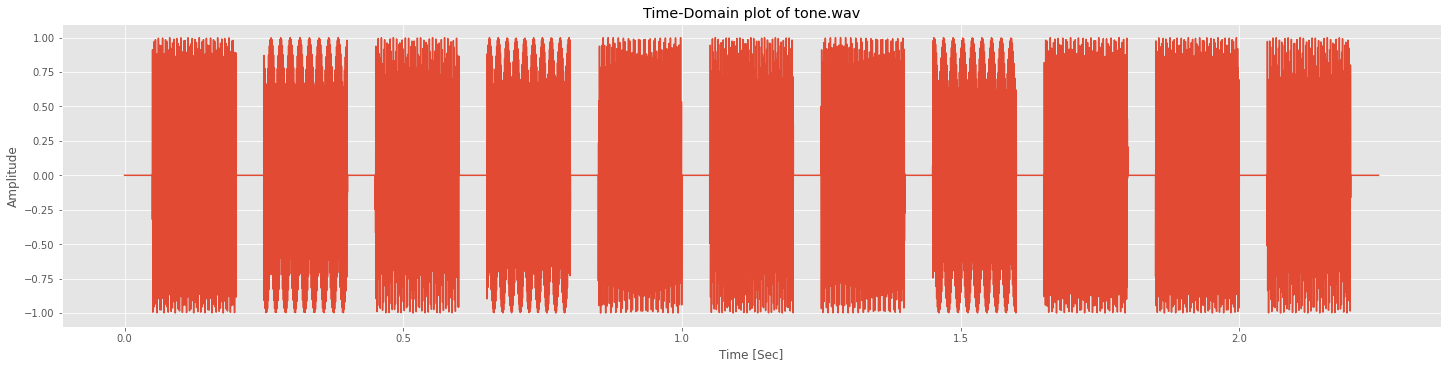

In [3]:
# Calculate time vector
time = np.arange(0, duration, 1 / sample_rate)

# Plot signal on time-domain
plt.figure(figsize = (20, 5), constrained_layout = True)
plt.plot(time, data)
plt.title('Time-Domain plot of tone.wav')
plt.xlabel('Time [Sec]')
plt.ylabel('Amplitude')
plt.show()

## B

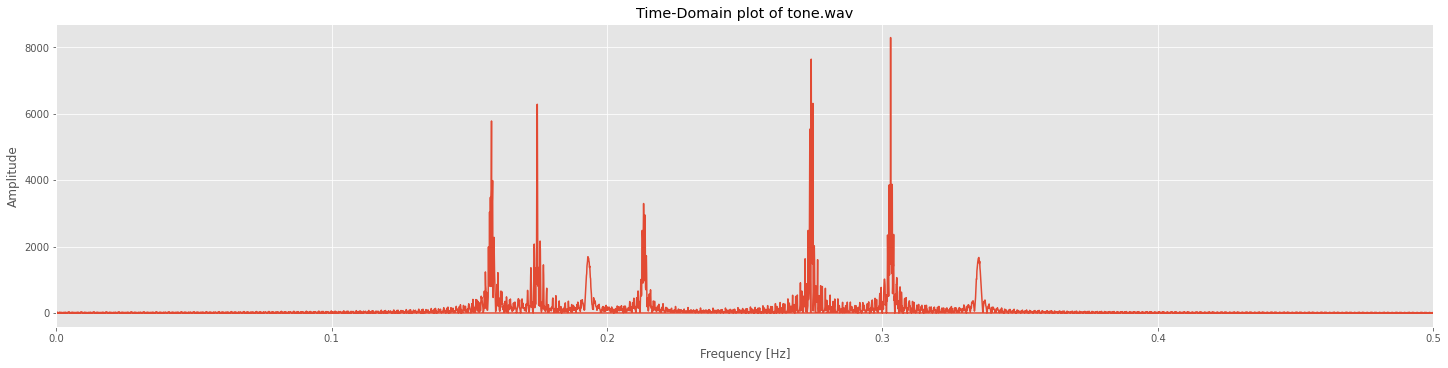

In [4]:
# Calculate fourier and frequency
fourier = np.fft.fft(data)
freq = np.fft.fftfreq(data.size, d = 0.1)

# Plot Amplitude
plt.figure(figsize = (20, 5), constrained_layout = True)
plt.xlim(0, 0.5)
plt.plot(freq, np.abs(fourier))
plt.title('Time-Domain plot of tone.wav')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

## C

Audio shape: (99225,), Sliced audio shape: (972, 2048)
Shape of slices transposed: (2048, 972)


C:\Users\Keivan\AppData\Local\Temp/ipykernel_17992/3107568551.py:13: RuntimeWarning: divide by zero encountered in log10
  spectrum = 20 * np.log10(spectrum / np.max(spectrum)) # Optional, comment to see the difference
C:\Users\Keivan\AppData\Local\Temp/ipykernel_17992/3107568551.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


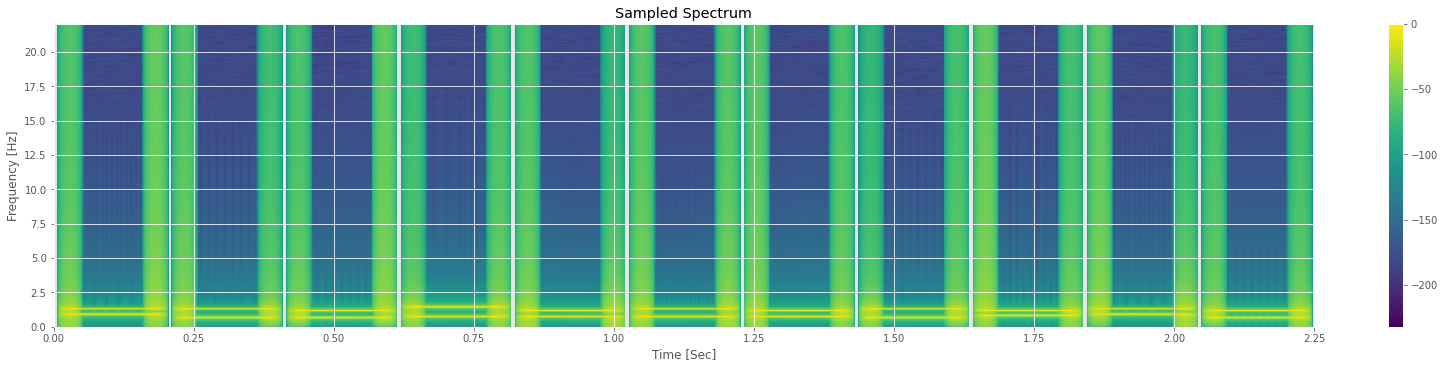

In [5]:
samples = 2048

# Sample
slices = util.view_as_windows(data, window_shape = (samples,), step = 100)
print(f'Audio shape: {data.shape}, Sliced audio shape: {slices.shape}')

# Transpose
slices = (slices * np.hanning(samples + 1)[:-1]).T
print(f'Shape of slices transposed: {slices.shape}')

# Calculate spectrum
spectrum = np.abs(np.fft.fft(slices, axis = 0)[:samples // 2 + 1: -1])
spectrum = 20 * np.log10(spectrum / np.max(spectrum)) # Optional, comment to see the difference

# Plot spectrum
plt.figure(figsize = (20, 5), constrained_layout = True)
plt.imshow(spectrum, origin = 'lower', cmap = 'viridis', extent = (0, duration, 0, sample_rate / 2000))
plt.axis('tight')
plt.title('Sampled Spectrum')
plt.xlabel('Time [Sec]')
plt.ylabel('Frequency [Hz]')
plt.colorbar()
plt.show()

## D

In [6]:
# Dials and their corresponding frequencies
dials = np.array([
     [697,1209],            # 1
     [697,1336],            # 2
     [697,1477],            # 3
     [770,1209],            # 4  
     [770,1336],            # 5
     [770,1477],            # 6
     [852,1209],            # 7
     [852,1336],            # 8 
     [852,1477],            # 9
     [941,1209],            # *
     [941,1336],            # 0
     [941,1477],            # #
])
keypad = ["{}".format(i) for i in range(1,10)] + ["*","0","#"]

E:\Softwares\Python 3.9.6\lib\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
C:\Users\Keivan\AppData\Local\Temp/ipykernel_17992/1559649990.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


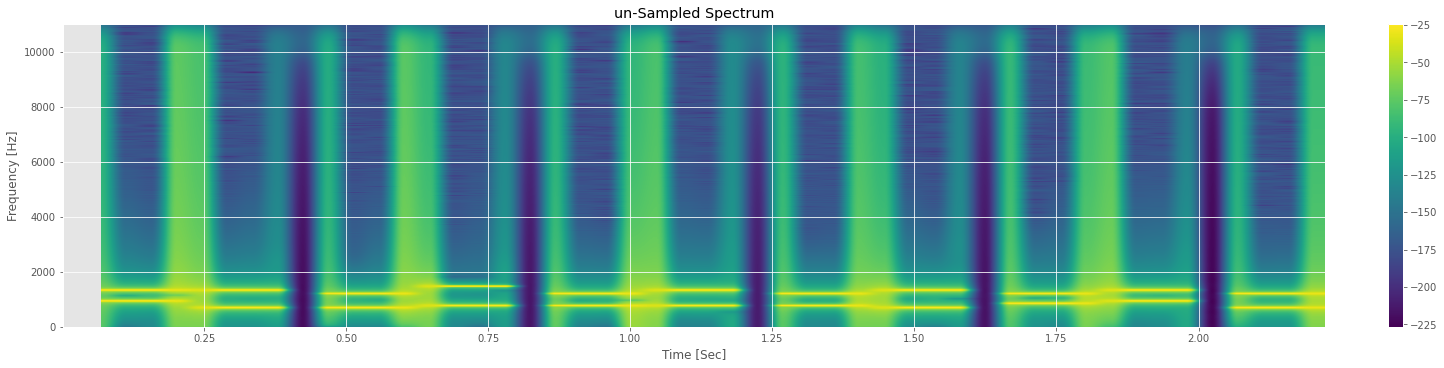

In [7]:
import librosa
data, sample_rate = librosa.load('tone.wav')

plt.figure(figsize = (20, 5), constrained_layout = True)
Pxx, freqs, bins, im = plt.specgram(data, Fs = sample_rate, NFFT = 1000, noverlap = 20)
plt.title('un-Sampled Spectrum')
plt.xlabel('Time [Sec]')
plt.ylabel('Frequency [Hz]')
plt.colorbar()
plt.show()

In [8]:
ifreqs, ibins = np.where(np.log10(Pxx) * 10 > -50)
bins_tone = bins[ibins]
freqs_tone = freqs[ifreqs]
X = np.array([bins_tone, freqs_tone]).T

## Time & Frequency for 15 points
for coord in range(15):
    print(f'Time (s): {X[coord, 0]}, Frequency (Hz): {X[coord, 1]}')

Time (s): 1.000453514739229, Frequency (Hz): 551.25
Time (s): 0.600453514739229, Frequency (Hz): 573.3000000000001
Time (s): 1.000453514739229, Frequency (Hz): 573.3000000000001
Time (s): 2.200453514739229, Frequency (Hz): 573.3000000000001
Time (s): 0.24489795918367346, Frequency (Hz): 595.35
Time (s): 0.600453514739229, Frequency (Hz): 595.35
Time (s): 1.000453514739229, Frequency (Hz): 595.35
Time (s): 1.4448979591836735, Frequency (Hz): 595.35
Time (s): 2.200453514739229, Frequency (Hz): 595.35
Time (s): 0.24489795918367346, Frequency (Hz): 617.4
Time (s): 0.600453514739229, Frequency (Hz): 617.4
Time (s): 1.000453514739229, Frequency (Hz): 617.4
Time (s): 1.4448979591836735, Frequency (Hz): 617.4
Time (s): 2.200453514739229, Frequency (Hz): 617.4
Time (s): 0.24489795918367346, Frequency (Hz): 639.45


C:\Users\Keivan\AppData\Local\Temp/ipykernel_17992/2192044250.py:1: RuntimeWarning: divide by zero encountered in log10
  ifreqs, ibins = np.where(np.log10(Pxx) * 10 > -50)


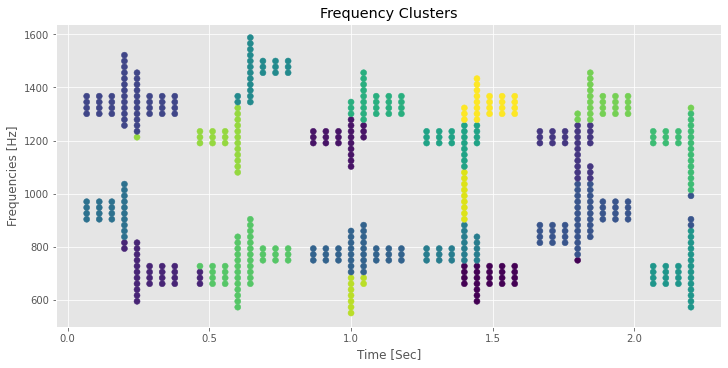

In [9]:
# We should cluster them together in order to see the dials crearly

# Normalize
Xcolstd = np.std(X, axis = 0)   # Standard deviation of each column
X_scale = X / Xcolstd           # Normalize STD


kmeans = KMeans(n_clusters = 20)
kmeans.fit(X_scale)
y_pred = kmeans.predict(X_scale)

plt.figure(figsize = (10, 5), constrained_layout = True)
plt.scatter(X[:, 0], X[:, 1], c = y_pred)
plt.title('Frequency Clusters')
plt.xlabel("Time [Sec]")
plt.ylabel("Frequencies [Hz]")
plt.show()

In [10]:
# rescale the cluster center
cluster_centers = kmeans.cluster_centers_ * Xcolstd # Apply STD
cluster_centers = np.array([np.round(cluster_centers[:, 0], 2), np.round(cluster_centers[:, 1], 0)]).T  # Recalculate and round-up centers

## reorder according to the time (sec)
cluster_centers = cluster_centers[np.argsort(cluster_centers[:, 0]),:]
for icenter in range(cluster_centers.shape[0]):
    print(f'Time [Sec]: {cluster_centers[icenter][0]},\t Frequency [Hz]: {cluster_centers[icenter][1]}')

Time [Sec]: 0.15,	 Frequency [Hz]: 937.0
Time [Sec]: 0.22,	 Frequency [Hz]: 1351.0
Time [Sec]: 0.3,	 Frequency [Hz]: 706.0
Time [Sec]: 0.55,	 Frequency [Hz]: 1207.0
Time [Sec]: 0.63,	 Frequency [Hz]: 739.0
Time [Sec]: 0.68,	 Frequency [Hz]: 1461.0
Time [Sec]: 0.97,	 Frequency [Hz]: 1206.0
Time [Sec]: 1.01,	 Frequency [Hz]: 630.0
Time [Sec]: 1.02,	 Frequency [Hz]: 780.0
Time [Sec]: 1.08,	 Frequency [Hz]: 1345.0
Time [Sec]: 1.37,	 Frequency [Hz]: 792.0
Time [Sec]: 1.37,	 Frequency [Hz]: 1202.0
Time [Sec]: 1.4,	 Frequency [Hz]: 992.0
Time [Sec]: 1.49,	 Frequency [Hz]: 1337.0
Time [Sec]: 1.5,	 Frequency [Hz]: 687.0
Time [Sec]: 1.78,	 Frequency [Hz]: 1178.0
Time [Sec]: 1.84,	 Frequency [Hz]: 907.0
Time [Sec]: 1.9,	 Frequency [Hz]: 1342.0
Time [Sec]: 2.16,	 Frequency [Hz]: 706.0
Time [Sec]: 2.17,	 Frequency [Hz]: 1179.0


In [11]:
# Group by to find dials clusters
cluster_dials = np.reshape(cluster_centers[:, 1:], (cluster_centers[:, 1:].shape[0] // 2, 2 * cluster_centers[:, 1:].shape[1]))
cluster_dials

array([[ 937., 1351.],
       [ 706., 1207.],
       [ 739., 1461.],
       [1206.,  630.],
       [ 780., 1345.],
       [ 792., 1202.],
       [ 992., 1337.],
       [ 687., 1178.],
       [ 907., 1342.],
       [ 706., 1179.]])

In [12]:
freq = []
for icenter in range(cluster_dials.shape[0]):
    cent = cluster_dials[icenter]
    dist2center = np.sum(np.power(dials - cent, 2), axis = 1)
    freq.append(keypad[np.argmin(dist2center)])
    
for dial, button in enumerate(freq, 1):
    print(f'Dial {dial} is Button {button}')

Dial 1 is Button 0
Dial 2 is Button 1
Dial 3 is Button 6
Dial 4 is Button *
Dial 5 is Button 5
Dial 6 is Button 4
Dial 7 is Button 0
Dial 8 is Button 1
Dial 9 is Button 0
Dial 10 is Button 1
